✅ Dataset Loaded Successfully!
Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

--- BASIC DATA INSIGHTS ---
Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

Dataset covers years from 2008.0 to 2021.0


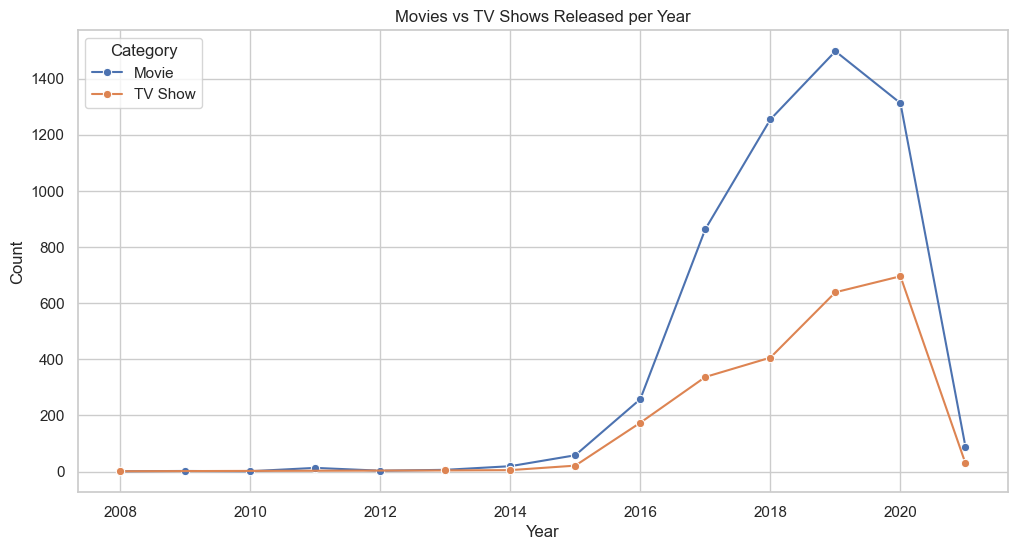

C:\Users\Harshini Koppuravuri\AppData\Local\Temp\ipykernel_18844\3136166802.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


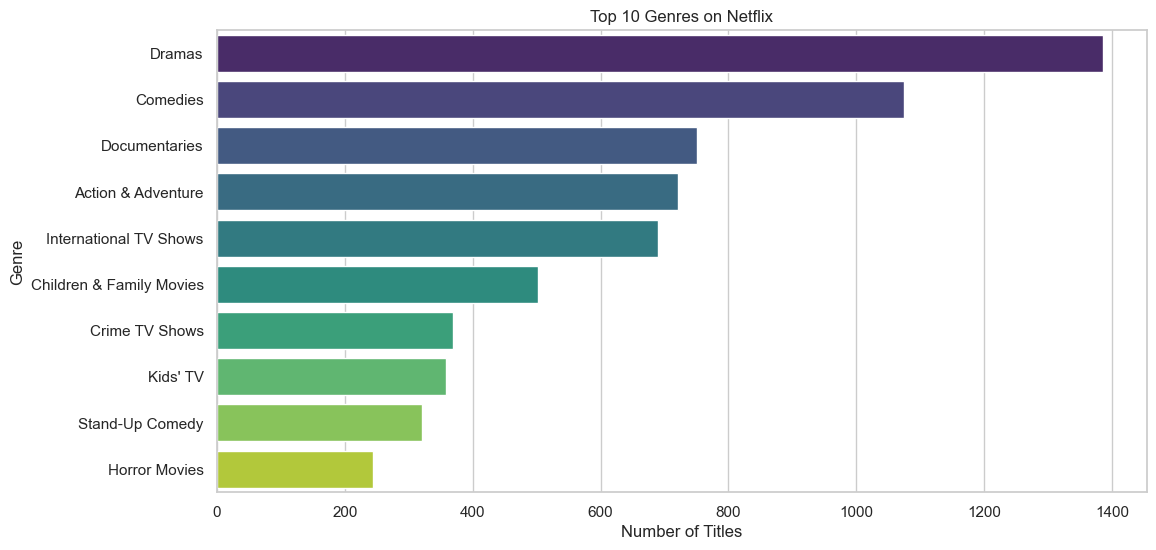

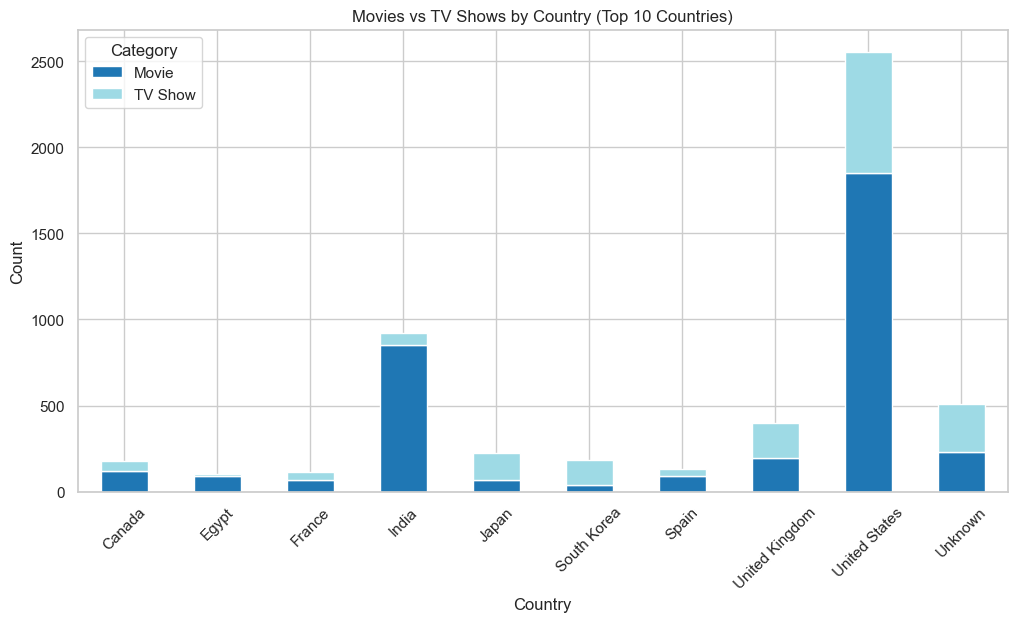

C:\Users\Harshini Koppuravuri\AppData\Local\Temp\ipykernel_18844\3136166802.py:103: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


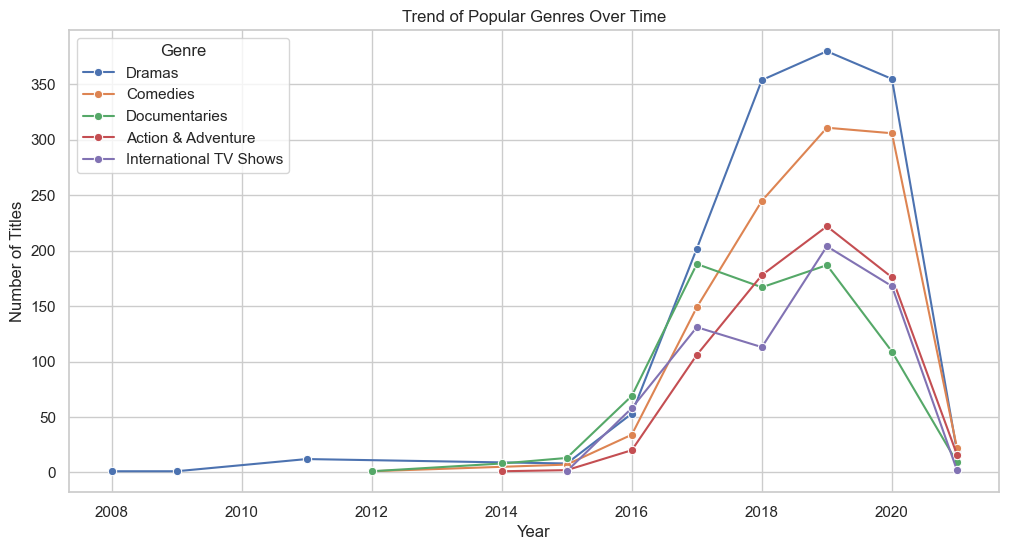


--- STRATEGIC INSIGHTS ---

1️⃣ Netflix’s overall content library has expanded significantly since 2015, especially in TV Shows.
2️⃣ Drama, Comedy, and International content dominate — reflecting broad audience appeal.
3️⃣ The United States, India, and the United Kingdom contribute the largest share of titles.
4️⃣ Growth in international genres suggests Netflix’s strong investment in global content.
5️⃣ Future Strategy:
   - Strengthen local productions in emerging markets (e.g., Korea, Spain, Latin America).
   - Diversify genre offerings with more Sci-Fi, Thriller, and Documentaries.
   - Balance global vs regional productions for wider audience engagement.


✅ Analysis Completed Successfully!


In [19]:
# -------------------------------------------------------
# Netflix Dataset Analysis - Content Trends & Strategy
# -------------------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------
df = pd.read_csv(r"C:\Users\Harshini Koppuravuri\OneDrive\Desktop\netflix project\Netflix Dataset.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# -------------------------------------------------------
# 3. Data Preparation & Cleaning
# -------------------------------------------------------

# Rename columns for consistency (if dataset follows standard Netflix Kaggle structure)
df.rename(columns={
    'type': 'Category',
    'listed_in': 'Type',
    'date_added': 'Release_Date',
    'country': 'Country',
    'rating': 'Rating',
    'director': 'Director',
    'cast': 'Cast'
}, inplace=True, errors='ignore')

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year
df['Year'] = df['Release_Date'].dt.year

# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

# Extract Main Genre (first genre listed)
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

# -------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# -------------------------------------------------------

print("\n--- BASIC DATA INSIGHTS ---")
print("Category Distribution:\n", df['Category'].value_counts())
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())

# -------------------------------------------------------
# 5. Visual Analyses
# -------------------------------------------------------

# 1️⃣ Movies vs TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
content_trend = content_trend.dropna(subset=['Year'])
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

# 2️⃣ Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# 3️⃣ Movies vs TV Shows by Country (Top 10)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts = country_counts[country_counts['Country'] != 'Unknown']

fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    color_continuous_scale="viridis",
    title="Netflix Content Distribution by Country"
)
fig.show()

# 5️⃣ Trend of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')
genre_trends = genre_trends.dropna(subset=['Year'])

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()

# -------------------------------------------------------
# 6. Strategic Insights
# -------------------------------------------------------
print("\n--- STRATEGIC INSIGHTS ---")
print("""
1️⃣ Netflix’s overall content library has expanded significantly since 2015, especially in TV Shows.
2️⃣ Drama, Comedy, and International content dominate — reflecting broad audience appeal.
3️⃣ The United States, India, and the United Kingdom contribute the largest share of titles.
4️⃣ Growth in international genres suggests Netflix’s strong investment in global content.
5️⃣ Future Strategy:
   - Strengthen local productions in emerging markets (e.g., Korea, Spain, Latin America).
   - Diversify genre offerings with more Sci-Fi, Thriller, and Documentaries.
   - Balance global vs regional productions for wider audience engagement.
""")

print("\n✅ Analysis Completed Successfully!")
